<a href="https://colab.research.google.com/github/pavan-kalam/PDS-Project/blob/main/deepfake_cnn_with_batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install opendatasets

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import io
import os
import matplotlib.pyplot as plt
import opendatasets as od
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential

In [ ]:
def download_dataset():
    if not os.path.exists('/content/drive/MyDrive/deepfake-and-real-images'):
        print("Downloading dataset...")
        od.download("https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")
        print("Dataset downloaded successfully!")
    else:
        print("Dataset already exists!")

In [ ]:
def load_dataset(path):
    return tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='binary',
        color_mode="rgb",
        batch_size=32,
        image_size=(128, 128),
        shuffle=True,
        seed=123,
    )

In [ ]:
def train_model(model, train_data, val_data, epochs=20):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data,
        callbacks=[early_stopping_cb]
    )

    return history

In [ ]:
def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize((128, 128))
    image_array = np.array(image)
    image_array = image_array.astype('float32') / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

In [ ]:
# Download the dataset
print("Checking for dataset...")
download_dataset()

Checking for dataset...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavankalam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images


100%|██████████| 1.68G/1.68G [01:18<00:00, 23.0MB/s]



Dataset downloaded successfully!


In [ ]:
# Load and preprocess the dataset
dataset_path = 'deepfake-and-real-images/Dataset'
train_data = load_dataset(os.path.join(dataset_path, 'Train'))
val_data = load_dataset(os.path.join(dataset_path, 'Validation'))

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


Training multiple models...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 248s 53ms/step - accuracy: 0.8010 - loss: 0.4332 - val_accuracy: 0.9136 - val_loss: 0.1868
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 255s 54ms/step - accuracy: 0.9524 - loss: 0.1206 - val_accuracy: 0.9306 - val_loss: 0.1712
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 223s 51ms/step - accuracy: 0.9656 - loss: 0.0875 - val_accuracy: 0.9549 - val_loss: 0.1114
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 265s 52ms/step - accuracy: 0.9730 - loss: 0.0689 - val_accuracy: 0.9128 - val_loss: 0.2092
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 289s 58ms/step - accuracy: 0.9779 - loss: 0.0563 - val_accuracy: 0.9646 - val_loss: 0.0964
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 236s 52ms/step - accuracy: 0.9807 - loss: 0.0484 - val_accuracy: 0.9626 - val_loss: 0.0933
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 273s 54ms/step - accuracy: 0.9828 - loss: 0.0422 - val_accuracy: 0.9629 - val_loss: 0.1317
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 248s 51ms/step - accuracy: 

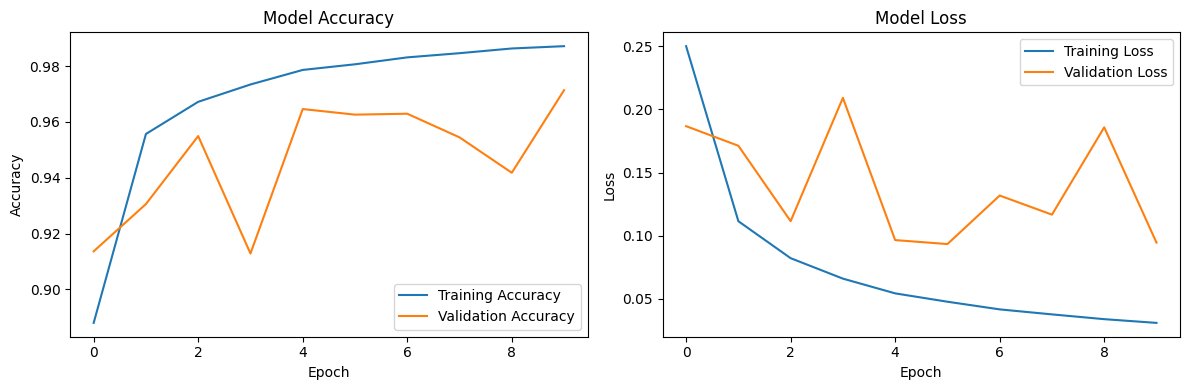

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, layers

def training_multiple_models():
    trained_models = {}

    # Model 3: CNN with Batch Normalization
    model3 = Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=(128, 128, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model3.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    # Direct training without early stopping - will run for exactly 20 epochs
    history3 = model3.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
        verbose=1  # This will show the progress bar
    )

    trained_models['CNN_BatchNorm'] = {
        'model': model3,
        'history': history3,
        'description': 'CNN with Batch Normalization'
    }

    model3.save('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/model/cnn_batchnormalization-1.keras')

    return trained_models

# Create directory for models if it doesn't exist
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/model', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/visualization', exist_ok=True)

# Train all models
print("Training multiple models...")
trained_models = training_multiple_models()

# Optional: Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(trained_models['CNN_BatchNorm']['history'].history['accuracy'], label='Training Accuracy')
plt.plot(trained_models['CNN_BatchNorm']['history'].history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(trained_models['CNN_BatchNorm']['history'].history['loss'], label='Training Loss')
plt.plot(trained_models['CNN_BatchNorm']['history'].history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/visualization/model_accuracy-loss.png')
plt.show()

In [ ]:
test = load_dataset(os.path.join(dataset_path, 'Test'))

Found 10905 files belonging to 2 classes.


In [ ]:
def evaluate_model(model, val_data):
    loss, accuracy = model.evaluate(val_data)
    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# Evaluate the model
evaluate_model(trained_models['CNN_BatchNorm']['model'], val_data)

1233/1233 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9695 - loss: 0.1002
Validation Loss: 0.0944, Validation Accuracy: 0.9713


In [ ]:
dataset_path = 'deepfake-and-real-images/Dataset'
training_data = os.path.join(dataset_path, 'Train')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 10905 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms

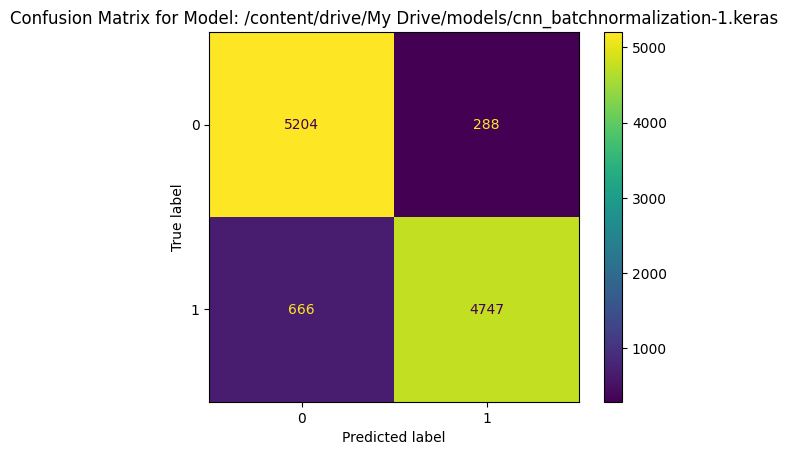

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load the dataset
def get_from_dir(dir):
    global path
    dir = os.path.join(path, dir)
    return tf.keras.utils.image_dataset_from_directory(
        dir,
        labels='inferred',
        color_mode="rgb",
        seed=42,
        batch_size=32,
        image_size=(128, 128))

# Set the path to the dataset
path = "deepfake-and-real-images/Dataset"

# Load the test dataset
test = get_from_dir("Test")

# Load the selected model from Google Drive
model_path = "/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/model/cnn_batchnormalization-1.keras"  # Adjust this path as necessary
model = tf.keras.models.load_model(model_path)

# Collect true labels and predictions
true_labels = []
predictions = []

# Iterate over the test dataset to collect true labels and predictions
for images, labels in test:
    true_labels.extend(labels.numpy())
    batch_predictions = model.predict(images) >= 0.5  # Get predictions
    predictions.extend(batch_predictions.astype(int).flatten())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title(f'Confusion Matrix for Model: {model_path}')
plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-model-with-batchnormalization/visualization/batchnormalization_confusionmatrix.png')
plt.show()